In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

In [2]:
#
# GETZCFEAT Gets the ZC feature (zero crossing).
#
# feat = getsscfeat(x,deadzone,winsize,wininc,datawin,dispstatus)
#
# Author Adrian Chan
# Ported to Python by Lachlan Smith on 15/1/2021
#
# This function computes the ZC feature of the signals in x,
# which are stored in columns.
#
# The signals in x are divided into multiple windows of size
# winsize and the windows are space wininc apart.
#
# Inputs
#    x:         columns of signals
#    deadzone:  +/- zone signal must cross to be considered a deadzone
#    winsize:    window size (length of x)
#    wininc:    spacing of the windows (winsize)
#    datawin:   window for data (e.g. Hamming, default rectangular)
#               must have dimensions of (winsize,1)

def getzcfeat( x , deadzone , winsize , wininc , datawin = None ):
    
    size = np.shape(x)
    datasize = size[0]
    
    
    try:
        Nsignals = size[1]
    except:
        Nsignals = 1
    
    #check if window shape has been included, if not
    #default to rectangular window :)
    if datawin is None:
        datawin = np.ones(winsize)
        
    #print(datawin)
    
    
    numwin = math.floor(((datasize - winsize) / wininc ) + 1)
    
    #allocate memory
    feat = np.zeros( (numwin,Nsignals) );
    
    st = 1;
    en = winsize+1;
    
    
    for i in range(numwin):
        
        y = np.transpose(x[st:en]) * np.tile(datawin,(Nsignals))
        #print(y)
       
        
        
        y = ((1*( y > deadzone )) - (1*( y < -deadzone )))  
        
        # forces the zeros towards either the positive or negative
        # the filter is chosen so that the most recent +1 or -1 has
        # the most influence on the state of the zero.
        a = 1
        b = np.exp(-(np.arange(1,(winsize/2))))
        z = lfilter(b, a, y)
        
        z = (1*(z > 0)) - (1*(z < -0))    
        dz = np.diff(z)
        
        
        feat[i,:] = np.sum( 1*(np.abs(dz) == 2) )
        
        st = st + wininc
        en = en + wininc
    
    return feat

In [3]:
data = np.genfromtxt('smallnoise_sin.csv', delimiter=',')
t = data[:,0]
s = data[:,1]
np.matrix.view(data)


array([[ 0.00000000e+00,  7.05655175e-02],
       [ 1.00000000e-02,  1.27430732e-01],
       [ 2.00000000e-02,  2.86476756e-02],
       ...,
       [ 1.99800000e+01, -1.85261565e-01],
       [ 1.99900000e+01, -8.09157108e-02],
       [ 2.00000000e+01, -4.31372559e-02]])

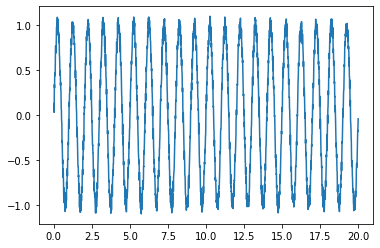

In [4]:
%matplotlib inline
plt.plot(t,s)

In [5]:
size = np.shape(s)
print(size)

(2001,)


In [7]:
result = getzcfeat(s,0.01,2000,2000)
print(result)

[[53.]]
